In [9]:
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt 
%matplotlib inline

In [133]:
df = pd.read_csv('zomato.csv',encoding = 'latin-1')
df.head(4)

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9551 entries, 0 to 9550
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Restaurant ID         9551 non-null   int64  
 1   Restaurant Name       9551 non-null   object 
 2   Country Code          9551 non-null   int64  
 3   City                  9551 non-null   object 
 4   Address               9551 non-null   object 
 5   Locality              9551 non-null   object 
 6   Locality Verbose      9551 non-null   object 
 7   Longitude             9551 non-null   float64
 8   Latitude              9551 non-null   float64
 9   Cuisines              9542 non-null   object 
 10  Average Cost for two  9551 non-null   int64  
 11  Currency              9551 non-null   object 
 12  Has Table booking     9551 non-null   object 
 13  Has Online delivery   9551 non-null   object 
 14  Is delivering now     9551 non-null   object 
 15  Switch to order menu 

In [49]:
col_name = list(df.columns)
df['Average Cost for two'].dtype
numerical_feature = [x for x in col_name if df[x].dtype == 'int64' or df[x].dtype == 'float64']
categroical_features = [x for x in col_name if df[x].dtype =='O']

print("The numerical Features : ", numerical_feature)
print('categroical_features : ', categroical_features)

The numerical Features :  ['Restaurant ID', 'Country Code', 'Longitude', 'Latitude', 'Average Cost for two', 'Price range', 'Aggregate rating', 'Votes']
categroical_features :  ['Restaurant Name', 'City', 'Address', 'Locality', 'Locality Verbose', 'Cuisines', 'Currency', 'Has Table booking', 'Has Online delivery', 'Is delivering now', 'Switch to order menu', 'Rating color', 'Rating text']


In [20]:
df.shape

(9551, 21)

In [54]:
df.describe()

,Restaurant ID,Country Code,Longitude,Latitude,Average Cost for two,Price range,Aggregate rating,Votes
count,9.551000e+03,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000
mean,9.051128e+06,18.365616,64.126574,25.854381,1199.210763,1.804837,2.666370,156.909748
std,8.791521e+06,56.750546,41.467058,11.007935,16121.183073,0.905609,1.516378,430.169145
min,5.300000e+01,1.000000,-157.948486,-41.330428,0.000000,1.000000,0.000000,0.000000
25%,3.019625e+05,1.000000,77.081343,28.478713,250.000000,1.000000,2.500000,5.000000
50%,6.004089e+06,1.000000,77.191964,28.570469,400.000000,2.000000,3.200000,31.000000
75%,1.835229e+07,1.000000,77.282006,28.642758,700.000000,2.000000,3.700000,131.000000
max,1.850065e+07,216.000000,174.832089,55.976980,800000.000000,4.000000,4.900000,10934.000000


In [58]:
# Missing Values
# Explore about the numerical feature
# Explore about the categorical Variables
# Finding the relationship between features
# Check for the duplicates

In [57]:
df.isnull().sum()

Restaurant ID           0
Restaurant Name         0
Country Code            0
City                    0
Address                 0
Locality                0
Locality Verbose        0
Longitude               0
Latitude                0
Cuisines                9
Average Cost for two    0
Currency                0
Has Table booking       0
Has Online delivery     0
Is delivering now       0
Switch to order menu    0
Price range             0
Aggregate rating        0
Rating color            0
Rating text             0
Votes                   0
dtype: int64

In [65]:
null_val_col = [features for features in df.columns if df[features].isnull().sum() > 0 ]

<Axes: >

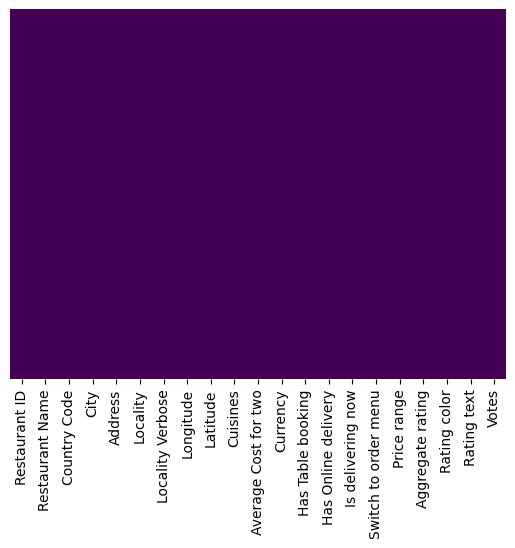

In [68]:
# Checking the missing values using the heatmap
sns.heatmap(df.isnull(),yticklabels=False, cbar = False , cmap = 'viridis') # 

In [78]:
# Importing the Country code file

df_country = pd.read_excel('Country-Code.xlsx')
df_country.shape
df_country

,Country Code,Country
0,1,India
1,14,Australia
2,30,Brazil
3,37,Canada
4,94,Indonesia
5,148,New Zealand
6,162,Phillipines
7,166,Qatar
8,184,Singapore
9,189,South Africa


In [80]:
df_country
final_df = pd.merge(df,df_country,on='Country Code',how='left')

In [81]:
final_df.head()

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes,Country
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Yes,No,No,No,3,4.8,Dark Green,Excellent,314,Phillipines
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Yes,No,No,No,3,4.5,Dark Green,Excellent,591,Phillipines
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Yes,No,No,No,4,4.4,Green,Very Good,270,Phillipines
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,No,No,No,No,4,4.9,Dark Green,Excellent,365,Phillipines
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Yes,No,No,No,4,4.8,Dark Green,Excellent,229,Phillipines


In [82]:
# To check the datatype 
final_df.dtypes

Restaurant ID             int64
Restaurant Name          object
Country Code              int64
City                     object
Address                  object
Locality                 object
Locality Verbose         object
Longitude               float64
Latitude                float64
Cuisines                 object
Average Cost for two      int64
Currency                 object
Has Table booking        object
Has Online delivery      object
Is delivering now        object
Switch to order menu     object
Price range               int64
Aggregate rating        float64
Rating color             object
Rating text              object
Votes                     int64
Country                  object
dtype: object

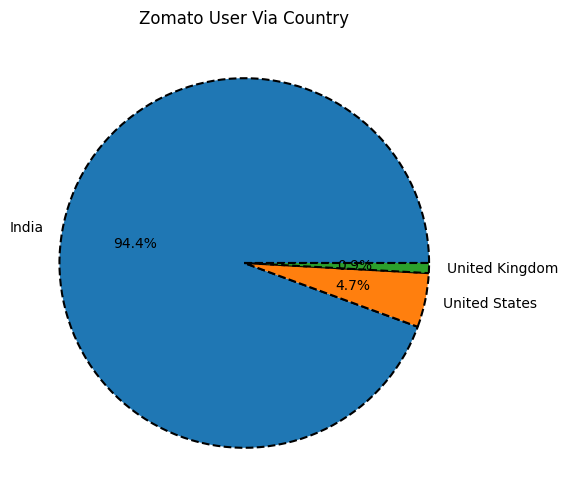

In [123]:
# This is useful in creating the pie charts

country_names = final_df['Country'].value_counts().index
country_counts = final_df['Country'].value_counts().values

plt.figure(figsize = (10,6))
plt.title('Zomato User Via Country')
plt.pie(x=country_counts[:3],labels=country_names[:3],autopct='%1.1f%%',wedgeprops={
    'edgecolor':'black', 'linewidth':1.5 ,'linestyle':'--'
})
plt.show()

# Zomato maximum users are based out of india then us and then uk

In [124]:
final_df.columns

Index(['Restaurant ID', 'Restaurant Name', 'Country Code', 'City', 'Address',
       'Locality', 'Locality Verbose', 'Longitude', 'Latitude', 'Cuisines',
       'Average Cost for two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Is delivering now', 'Switch to order menu',
       'Price range', 'Aggregate rating', 'Rating color', 'Rating text',
       'Votes', 'Country'],
      dtype='object')

In [136]:
rating_df = final_df.groupby(['Aggregate rating', 'Rating color', 'Rating text']).size().reset_index().rename(columns={0: 'Rating Count'})
rating_df

,Aggregate rating,Rating color,Rating text,Rating Count
0,0.0,White,Not rated,2148
1,1.8,Red,Poor,1
2,1.9,Red,Poor,2
3,2.0,Red,Poor,7
4,2.1,Red,Poor,15
5,2.2,Red,Poor,27
6,2.3,Red,Poor,47
7,2.4,Red,Poor,87
8,2.5,Orange,Average,110
9,2.6,Orange,Average,191


In [146]:
# Observation :
# rating betweeon 4.5 - 4.9 ----> It is Excellent
# rating berween 1.8 - 2.4 ----> It is Poor
# Over 2148 people have not rated  


rating_df['Rating color'].unique()

array(['White', 'Red', 'Orange', 'Yellow', 'Green', 'Dark Green'],
      dtype=object)

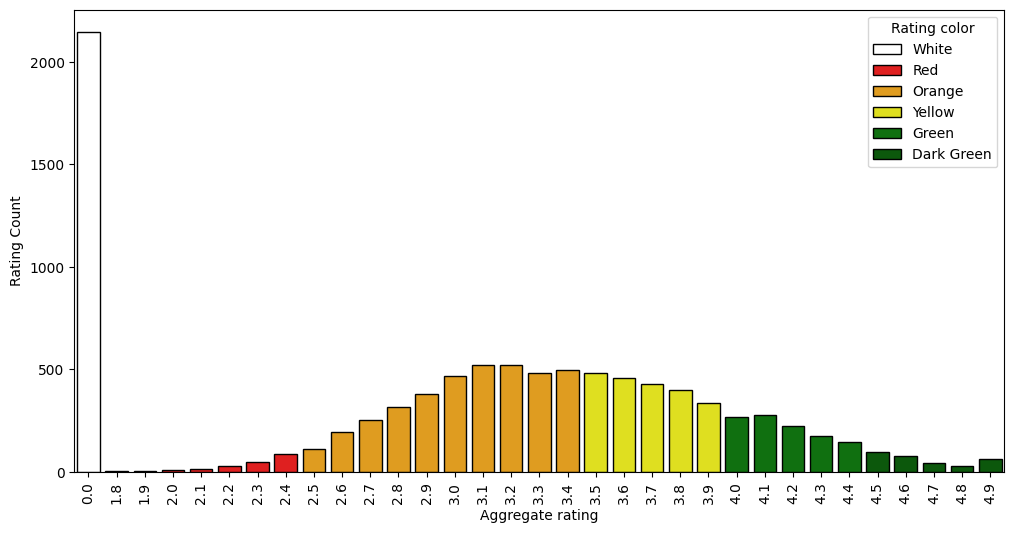

In [151]:
custom_palette = {
    'White': '#FFFFFF',     # White
    'Red': '#FF0000',       # Red
    'Orange': '#FFA500',    # Orange
    'Yellow': '#FFFF00',    # Yellow
    'Green': '#008000',     # Green
    'Dark Green': '#006400' # Dark Green
}
plt.figure(figsize=(12,6))
sns.barplot(rating_df,x='Aggregate rating',y='Rating Count',hue='Rating color',palette=custom_palette,edgecolor = 'black')
plt.xticks(rotation = 90)
plt.show()

In [ ]:
# Not Rated Count is Very High
# Maximum Number of rating are between 2.5 to 3.4

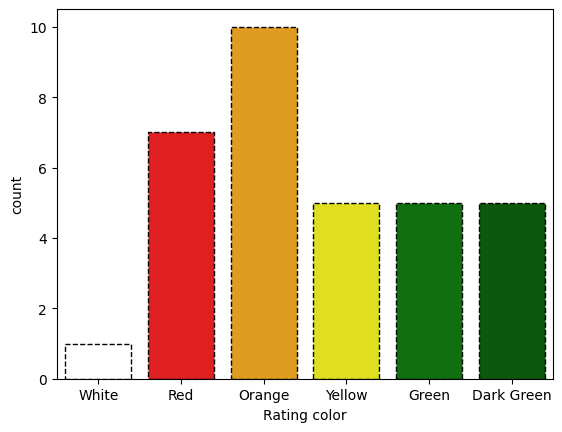

In [158]:
# Countplot
sns.countplot(x='Rating color',data = rating_df,hue = 'Rating color',palette=custom_palette,edgecolor = 'black', linestyle = '--')
plt.show()

In [181]:
# Find the Countries that has given 0 rating
not_rated_countries = final_df[final_df['Aggregate rating']==0]['Country'].value_counts().reset_index()
not_rated_countries
# sns.barplot(data=not_rated_countries,x='Country',y='count',hue='Country')
# plt.show()

# As we can See there is a lot of difference between the india and other countries of people who have not rated so the best plot is the pie plot
not_rated_countries


# Alternative using groupby
# First condition then what we want and then use size in steadof value_counts
final_df[final_df['Aggregate rating']==0].groupby('Country').size().reset_index().sort_values(by='Country',ascending=True)



,Country,0
0,Brazil,5
1,India,2139
2,United Kingdom,1
3,United States,3


In [ ]:
# To se all the aggregate 
final_df.groupby(['Aggregate rating','Country']).size().reset_index().head(5) # Very Important thing i learned

,Aggregate rating,Country,0
0,0.0,Brazil,5
1,0.0,India,2139
2,0.0,United Kingdom,1
3,0.0,United States,3
4,1.8,India,1


In [187]:
# Observation - MAximum Number of Non Rated Customers are from India


In [195]:
# Find out which currency is used by which Country
country_currency_df = final_df.groupby(['Country','Currency']).size().reset_index()
country_currency_df.drop(columns=0,axis=1,inplace=True)
country_currency_df

,Country,Currency
0,Australia,Dollar($)
1,Brazil,Brazilian Real(R$)
2,Canada,Dollar($)
3,India,Indian Rupees(Rs.)
4,Indonesia,Indonesian Rupiah(IDR)
5,New Zealand,NewZealand($)
6,Phillipines,Botswana Pula(P)
7,Qatar,Qatari Rial(QR)
8,Singapore,Dollar($)
9,South Africa,Rand(R)


In [207]:
## Which Countries do have Online Deliveries Option
tech_country = final_df[final_df['Has Online delivery']=='Yes']['Country'].value_counts()
tech_country # If want in numbers other wise we can use unique just to deliver the countries but value counts is more plausible

Country
India    2423
UAE        28
Name: count, dtype: int64

In [ ]:
# Method - II
[final_df.groupby(['Has Online delivery','Country']).size().reset_index()]

,Has Online delivery,Country,0
0,No,Australia,24
1,No,Brazil,60
2,No,Canada,4
3,No,India,6229
4,No,Indonesia,21
5,No,New Zealand,40
6,No,Phillipines,22
7,No,Qatar,20
8,No,Singapore,20
9,No,South Africa,60


In [214]:
final_df.groupby(['Has Online delivery','Country']).size().reset_index()

,Has Online delivery,Country,0
0,No,Australia,24
1,No,Brazil,60
2,No,Canada,4
3,No,India,6229
4,No,Indonesia,21
5,No,New Zealand,40
6,No,Phillipines,22
7,No,Qatar,20
8,No,Singapore,20
9,No,South Africa,60


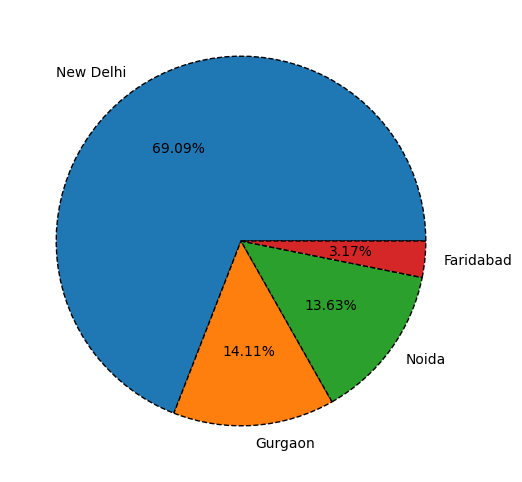

,City,count
0,New Delhi,5473
1,Gurgaon,1118
2,Noida,1080
3,Faridabad,251
4,Ghaziabad,25
...,...,...
136,Panchkula,1
137,Mc Millan,1
138,Mayfield,1
139,Macedon,1


In [228]:
city_df = final_df['City'].value_counts().reset_index()
plt.figure(figsize=(12,6))
plt.pie(city_df['count'][:4],labels=city_df['City'][:4],autopct = '%1.2f%%',wedgeprops={'edgecolor' : 'black','linestyle' : '--'})
plt.show()
city_df